In [430]:
import glob
import json
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import networkx as nx
import statistics

In [120]:
import warnings
import os
warnings.filterwarnings('ignore') # ignore deprecation warnings

In [121]:
def clean_mentions(x):
    x = re.sub(r'\w*@\w*', '', x)
    return x

In [124]:
tweets_dict = {}

# Read every *.jsons file in the ./tweet_jsons/ directory and copy them into a pandas dataframe
for filepath in glob.iglob('./tweet_jsons/*.json'):
    tweets_df = pd.read_json(filepath, lines=True)
        
    if not tweets_df.empty:
        tweets_df["content"] = tweets_df["content"].astype(str)
        tweets_df["content"] = tweets_df["content"].apply(clean_mentions)
    
    tweets_dict[filepath[14:-5]] = tweets_df
    
print(list(tweets_dict.keys()))

['danheld', 'Crypto_goat_', 'justinsuntron', 'tyler', 'VentureCoinist', 'aantonop', 'charlieshrem', 'notsofast', 'rogerkver', 'Sicarious_', 'barrysilbert', 'jimmysong', 'michael_saylor', 'APompliano', 'lopp', 'scottmelker', 'WhalePanda', 'peterlbrandt', 'ToneVays', 'Thecryptodog', 'VinnyLingham', 'erikvoorhees', 'balajis', 'crypto_rand', 'CryptoYoda1338', 'NicTrades', 'woonomic', 'cz_binance', 'mskvsk', 'cryptomocho', 'novogratz', 'Nickszabo4', 'PeterSchiff', 'Nouriel']


In [130]:
nodes = sorted(list(tweets_dict.keys()), key=str.casefold)
print(nodes)

['aantonop', 'APompliano', 'balajis', 'barrysilbert', 'charlieshrem', 'Crypto_goat_', 'crypto_rand', 'cryptomocho', 'CryptoYoda1338', 'cz_binance', 'danheld', 'erikvoorhees', 'jimmysong', 'justinsuntron', 'lopp', 'michael_saylor', 'mskvsk', 'Nickszabo4', 'NicTrades', 'notsofast', 'Nouriel', 'novogratz', 'peterlbrandt', 'PeterSchiff', 'rogerkver', 'scottmelker', 'Sicarious_', 'Thecryptodog', 'ToneVays', 'tyler', 'VentureCoinist', 'VinnyLingham', 'WhalePanda', 'woonomic']


In [191]:
len(nodes)

34

In [131]:
#Keyword filtering: only retain tweets related to cryptocurrency and remove empty lists

keywords = ["btc", "bitcoin", "XBT", "satoshi"]

for key in list(tweets_dict.keys()):
    #print(tweets_dict[key])
    if not tweets_dict[key].empty:
        tweets_dict[key] = tweets_dict[key][tweets_dict[key]["content"].str.contains('|'.join(keywords), na = False, case = False)]
    if tweets_dict[key].empty:
        del tweets_dict[key]

In [132]:
%store nodes
%store tweets_dict

Stored 'nodes' (list)
Stored 'tweets_dict' (dict)


In [133]:
tweets_dict['Crypto_goat_'].head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,coordinates,place
1,https://twitter.com/crypto_goat_/status/137689...,2021-03-30 13:40:24+00:00,Chipotle accepting #Bitcoin? 👀 https://t.co/wa...,Chipotle accepting #Bitcoin? 👀 twitter.com/Chi...,1376892067620741120,"{'username': 'crypto_goat_', 'displayname': 'C...",[https://twitter.com/ChipotleTweets/status/137...,[https://t.co/wanA9sPT0J],25,3,...,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,{'url': 'https://twitter.com/ChipotleTweets/st...,None,NaN,NaN
5,https://twitter.com/crypto_goat_/status/137662...,2021-03-29 19:58:17+00:00,#Bitcoin vs #Gold https://t.co/4xx1EbxzBf,#Bitcoin vs #Gold https://t.co/4xx1EbxzBf,1376624777058746369,"{'username': 'crypto_goat_', 'displayname': 'C...",[],[],2,2,...,und,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,None,None,NaN,NaN
9,https://twitter.com/crypto_goat_/status/137660...,2021-03-29 18:40:34+00:00,Miami Mayor Wants to Build a #Bitcoin Mining H...,Miami Mayor Wants to Build a #Bitcoin Mining H...,1376605215093309440,"{'username': 'crypto_goat_', 'displayname': 'C...",[https://www.btctimes.com/news/Miami-Mayor-bet...,[https://t.co/uqi2exua7v],5,6,...,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,None,None,NaN,NaN
20,https://twitter.com/crypto_goat_/status/137552...,2021-03-26 19:07:09+00:00,Follow on #BitClout \n\nhttps://t.co/gyAXuRe0...,Follow @crypto_goat_ on #BitClout \n\nbitclout...,1375524743210754050,"{'username': 'crypto_goat_', 'displayname': 'C...",[https://bitclout.com/u/Crypto_Goat_?tab=creat...,[https://t.co/gyAXuRe0sk],1,2,...,fi,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,None,"[{'username': 'crypto_goat_', 'displayname': '...",NaN,NaN
23,https://twitter.com/crypto_goat_/status/137544...,2021-03-26 13:37:35+00:00,BTCS Expands its Ethereum 2.0 Staking Operatio...,BTCS Expands its Ethereum 2.0 Staking Operatio...,1375441806947667968,"{'username': 'crypto_goat_', 'displayname': 'C...",[https://cryptocoin.news/press-releases/btcs-n...,[https://t.co/Ir1eZpyTgw],0,3,...,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,None,"[{'username': 'BitcoinShopUS', 'displayname': ...",NaN,NaN


In [134]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub(r'http\S+', '', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub('\n', '', result)
    result = result.strip()

    return result

### Flair

We have eliminated Flair because the scores that flair gives are too polarized to observe a difference. 

import flair 
from flair.data import Sentence 
from flair.models import TextClassifier
classifier = TextClassifier.load('en-sentiment')

def flair(tweet):
    text = Sentence(tweet)
    classifier.predict(text)
    
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
        
    return round(result, 3)

### NLTK

In [135]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def nltk(text):
    score = analyzer.polarity_scores(text)
    return score

### TextBlob

In [136]:
from textblob import TextBlob
from textblob.sentiments import PatternAnalyzer # pattern analyzer is the defaultfrom textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

def textblob(text):
    blob = TextBlob(text)
    return blob.sentiment

### Creating a week index for data smoothing 

timeframe: sep 2020 till march 2021, is when the crypto heat sped up and it also provides 30 weeks of data points 

In [137]:
def date_to_week(date):
    week = date.isocalendar()[1]
    week = (week + 52 - 35) % 52
    return week

### Turn results into CSV

In [138]:
for name in nodes:
    data = tweets_dict[name]
    tweets = pd.DataFrame()
    tweets['date'] = data['date'].apply(lambda x: str(x)[:10])
    tweets['date'] = pd.to_datetime(tweets['date'])
    tweets['week'] = tweets['date'].apply(date_to_week)
    tweets['tweets'] = data['content']
    tweets['tweets'] = tweets['tweets'].astype(str)
    tweets['processed'] = tweets['tweets'].apply(clean)
    
    # nlp packages
    # tweets['flair'] = tweets['tweets'].apply(lambda x: flair(x))
    tweets['nltk'] = tweets['tweets'].apply(nltk)
    tweets['textblob'] = tweets['tweets'].apply(textblob)
    
    tweets['nltk-compound'] = tweets['nltk'].apply(lambda x: x['compound'])
    tweets['nltk-pos'] = tweets['nltk'].apply(lambda x: x['pos'])
    tweets['nltk-neg'] = tweets['nltk'].apply(lambda x: x['neg'])
    tweets['tb-polarity'] = tweets['textblob'].apply(lambda x: x[0])
    tweets['tb-subjectivity'] = tweets['textblob'].apply(lambda x: x[1])
    tweets = tweets.drop(columns = ['nltk', 'textblob'])
    tweets = tweets.iloc[::-1]
    
    # get everyone's initial opinion
    
    
    with open('processed_csv/{}.csv'.format(name + '_processed'),'w') as f:
        tweets.to_csv(f, index = False)

In [139]:
for name in nodes[:1]:
    data = pd.read_csv('processed_csv/{}.csv'.format(name + '_processed'))

In [153]:
data.loc[1]['nltk-compound']

0.08457142857142859

In [151]:
data.head()

,nltk-compound,nltk-pos,nltk-neg,tb-polarity,tb-subjectivity
week,,,,,
1,0.084571,0.062571,0.056857,0.171429,0.494444
2,0.421700,0.150714,0.010714,0.302635,0.445202
3,0.210100,0.079429,0.028429,0.167107,0.420931
4,0.017025,0.085667,0.062750,0.151238,0.546659
5,0.475300,0.136000,0.093000,-0.033333,0.850000


In [142]:
nodes[:1]

['aantonop']

### Plotting Sentiment scores

In [159]:
index = range(1, 31)
nltk_aggregate = pd.DataFrame(index = index)
tb_polarity_aggregate = pd.DataFrame(index = index)
tb_subjectivity_aggregate = pd.DataFrame(index = index)

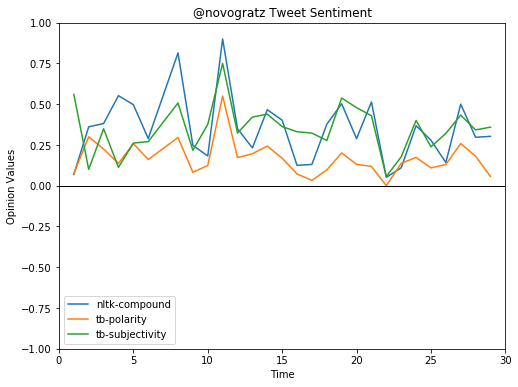

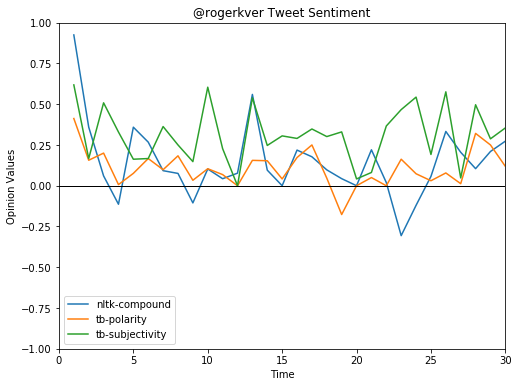

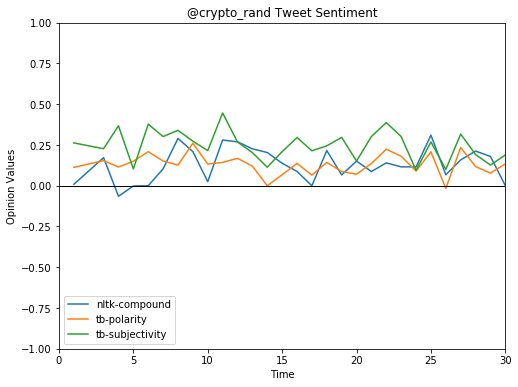

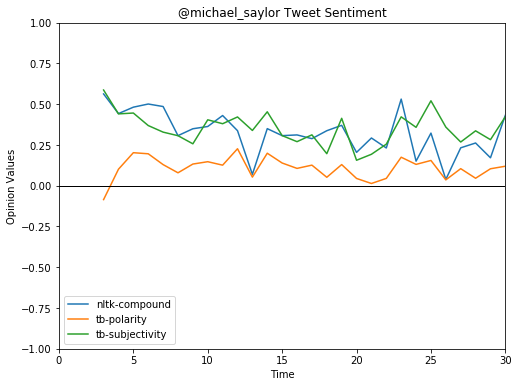

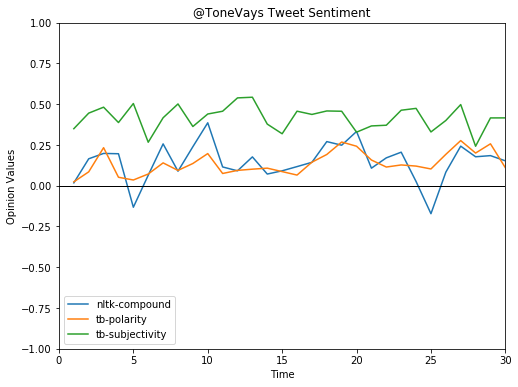

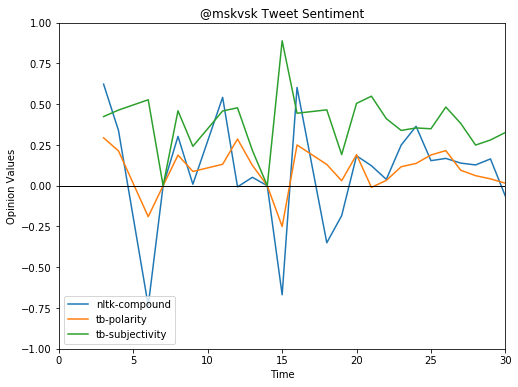

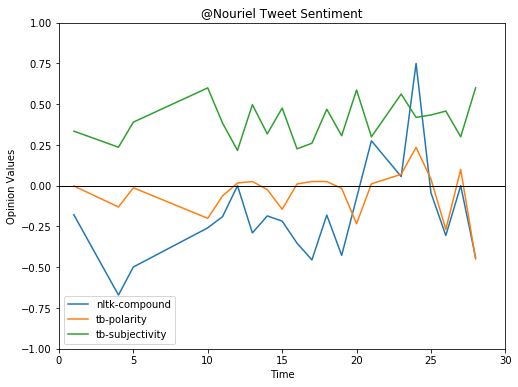

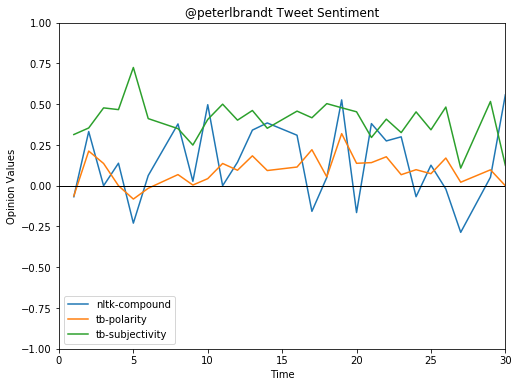

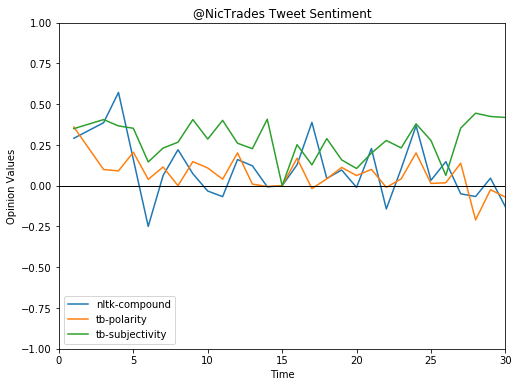

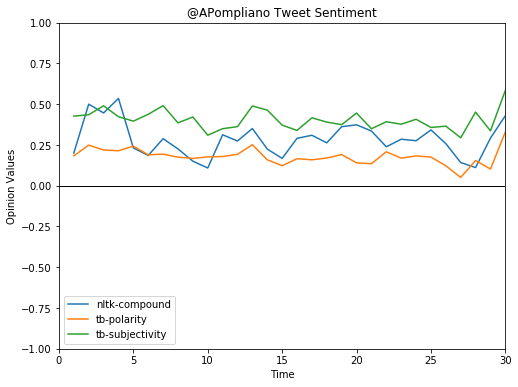

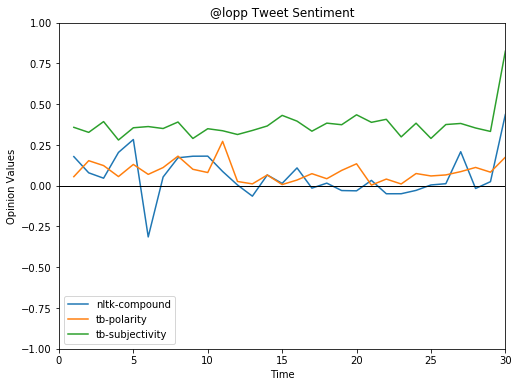

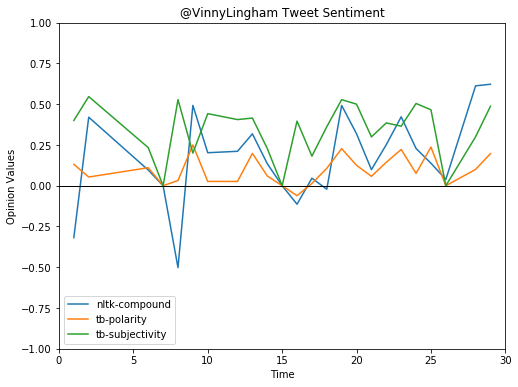

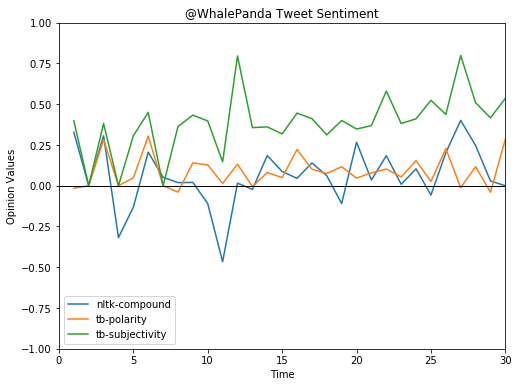

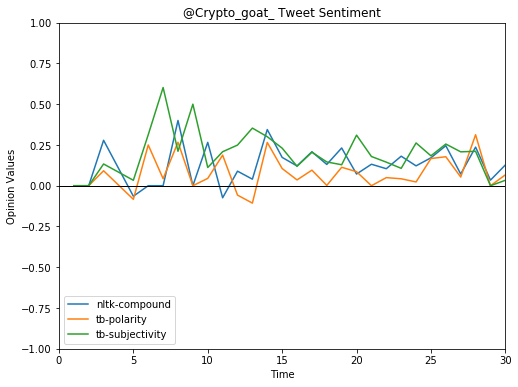

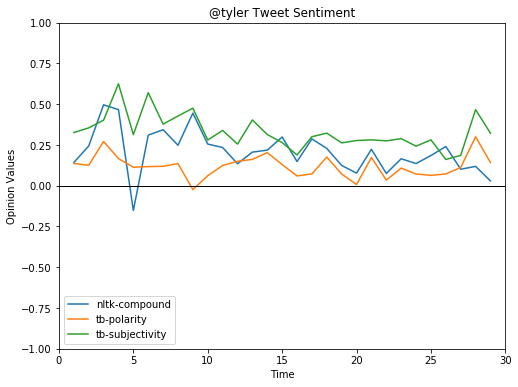

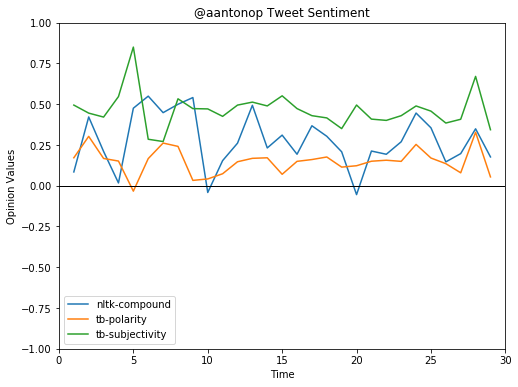

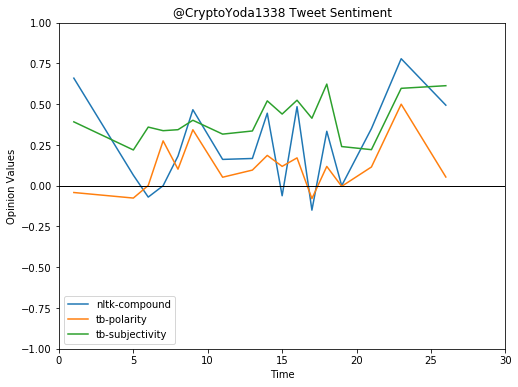

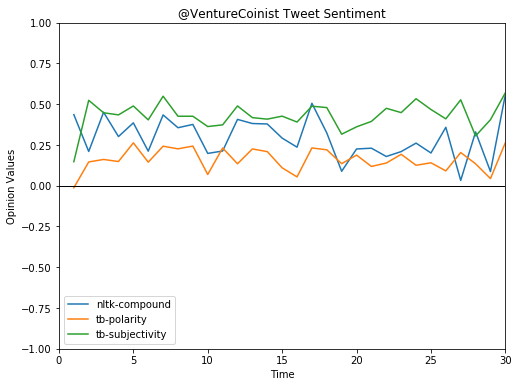

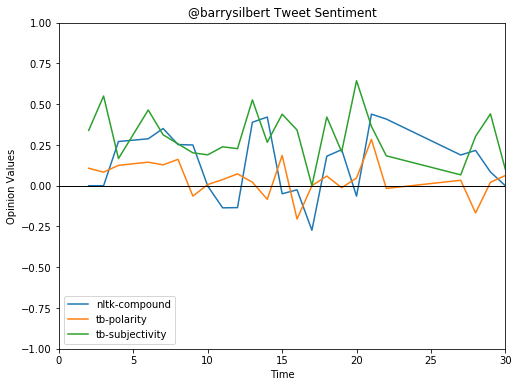

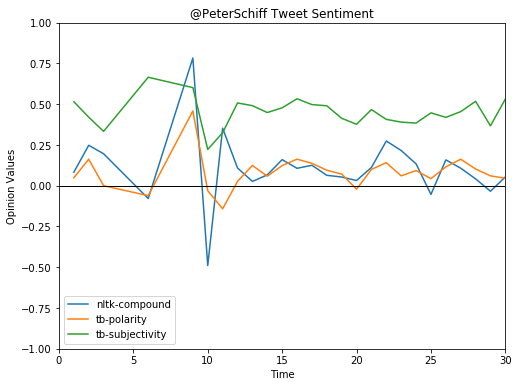

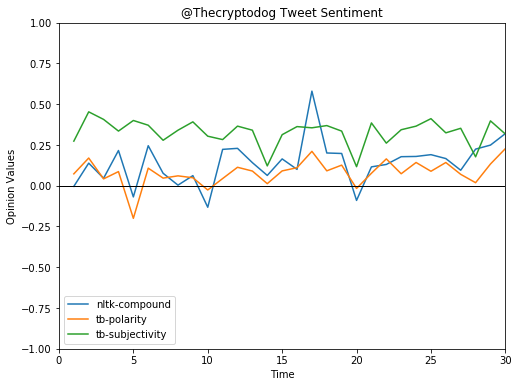

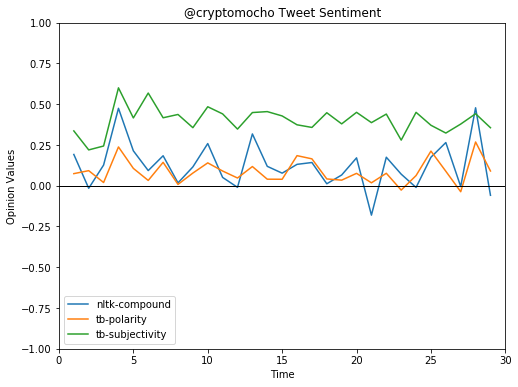

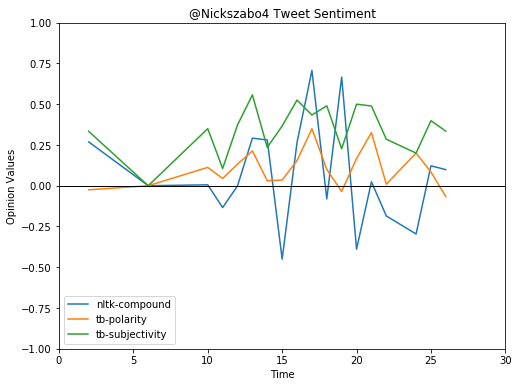

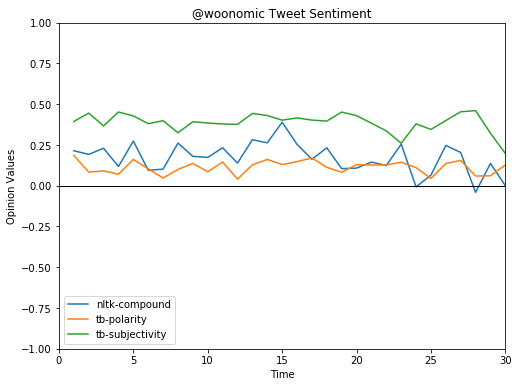

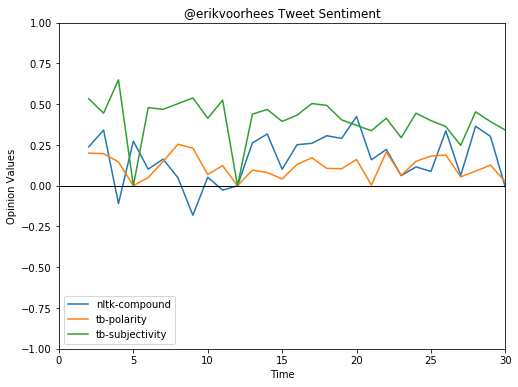

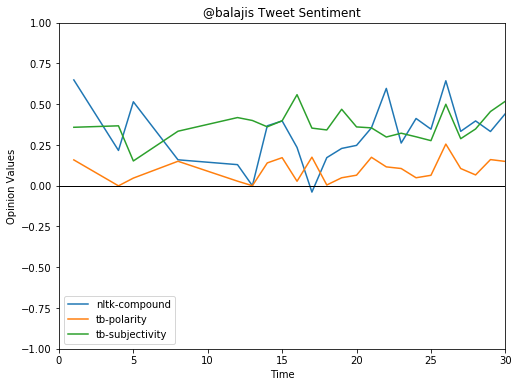

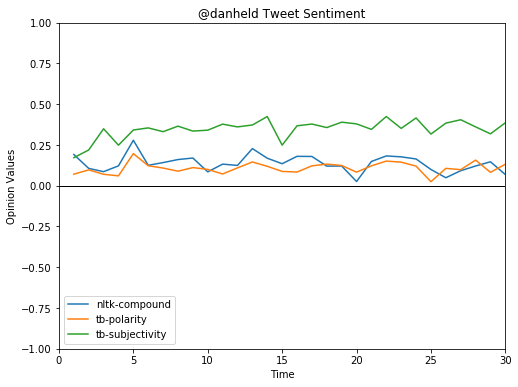

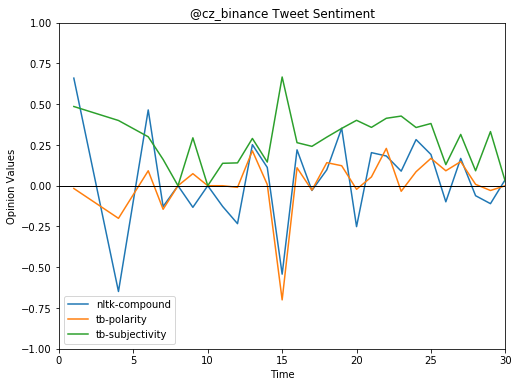

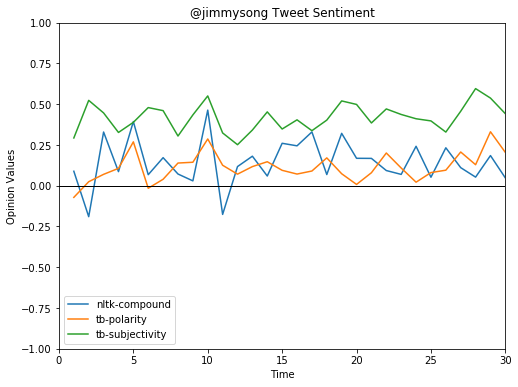

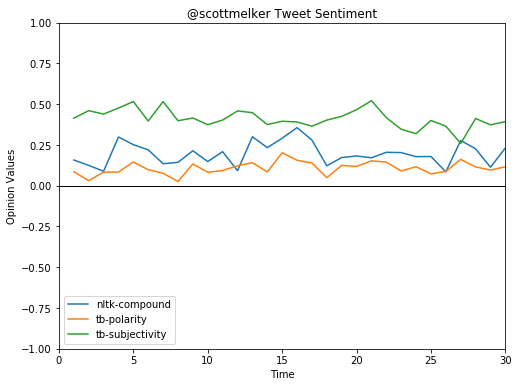

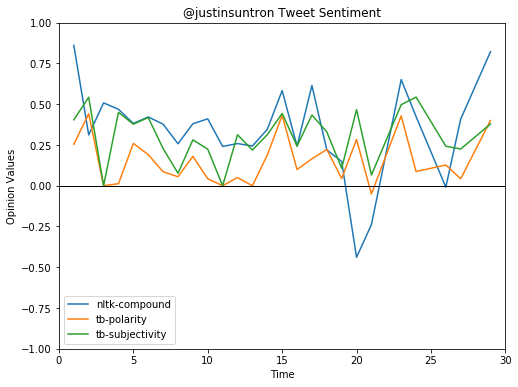

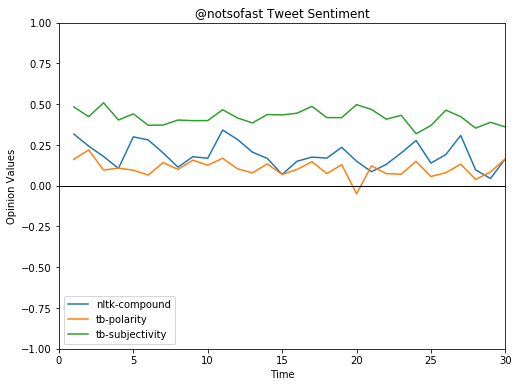

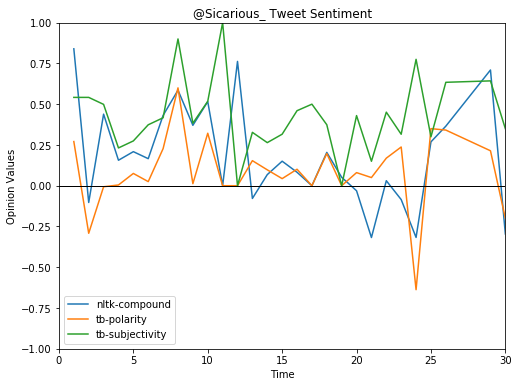

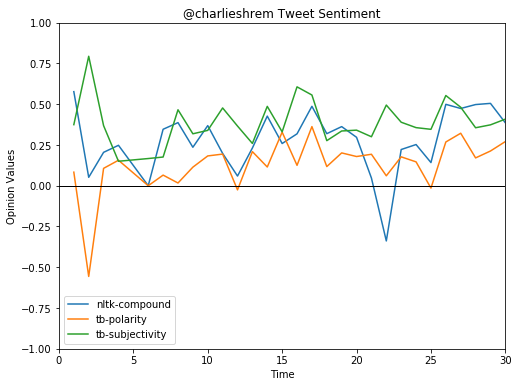

In [340]:
for name in nodes:
    data = pd.read_csv('processed_csv/{}.csv'.format(name + '_processed'))
    data = data.drop(columns = ['tweets', 'processed'])
    data = data.groupby('week').mean()
    
    # adding data into the aggregated df
    nltk_aggregate[name] = data['nltk-compound']
    tb_polarity_aggregate[name] = data['tb-polarity']
    tb_subjectivity_aggregate[name] = data['tb-subjectivity']
    
    plt.figure(figsize=(8,6))
    plt.plot(data['nltk-compound'], label = 'nltk-compound')
#     plt.plot(data['nltk-pos'], label = 'nltk-pos')
#     plt.plot(data['nltk-neg'], label = 'nltk-neg')
    plt.plot(data['tb-polarity'], label = 'tb-polarity')
    plt.plot(data['tb-subjectivity'], label = 'tb-subjectivity')
    plt.xlim([0, 30])
    plt.ylim([-1, 1])
    plt.axhline(y = 0, color = 'k', linestyle = '-', lw = '1')
    plt.legend(loc = "lower left")
    plt.xlabel('Time')
    plt.ylabel('Opinion Values')
    plt.title('@' + name + ' Tweet Sentiment')
    # plt.xticks(range(0,21))
    # plt.savefig("./FYP-Graphs/simple_avg_opdyn.png")

In [341]:
nltk_aggregate.head()

,aantonop,APompliano,balajis,barrysilbert,charlieshrem,Crypto_goat_,crypto_rand,cryptomocho,CryptoYoda1338,cz_binance,...,rogerkver,scottmelker,Sicarious_,Thecryptodog,ToneVays,tyler,VentureCoinist,VinnyLingham,WhalePanda,woonomic
1,0.084571,0.200689,0.648600,NaN,0.576833,0.000000,0.008600,0.191667,0.65970,0.6597,...,0.924600,0.157638,0.839500,-0.003960,0.017608,0.142360,0.435900,-0.3182,0.32824,0.214600
2,0.421700,0.500033,NaN,0.00000,0.051600,0.000000,NaN,-0.015713,NaN,NaN,...,0.359500,0.124704,-0.102700,0.138447,0.165105,0.243392,0.210033,0.4201,0.00000,0.192110
3,0.210100,0.446339,NaN,0.00000,0.204700,0.278667,0.172027,0.126640,NaN,NaN,...,0.060233,0.088673,0.438767,0.045804,0.198075,0.496217,0.450480,NaN,0.30645,0.229709
4,0.017025,0.535517,0.216362,0.27115,0.247875,NaN,-0.064600,0.474680,NaN,-0.6486,...,-0.113533,0.298892,0.156240,0.215900,0.196072,0.466500,0.301467,NaN,-0.31820,0.118167
5,0.475300,0.231887,0.514700,NaN,NaN,-0.064400,-0.001767,0.213993,0.06464,NaN,...,0.358850,0.251658,0.208857,-0.068600,-0.131943,-0.151580,0.385417,NaN,-0.13160,0.273608


In [309]:
initial_op = nltk_aggregate.loc[1]
initial_op = initial_op.to_frame()
initial_op.dropna(inplace=True)
len(initial_op)

29

In [310]:
initial_op

,1
aantonop,0.084571
APompliano,0.200689
balajis,0.648600
charlieshrem,0.576833
Crypto_goat_,0.000000
crypto_rand,0.008600
cryptomocho,0.191667
CryptoYoda1338,0.659700
cz_binance,0.659700
danheld,0.191459


In [311]:
initial_op.reset_index(inplace=True)
initial_op.columns = ['name', 'opinion']

In [312]:
initial_na = pd.read_csv('initial_na.csv')

In [313]:
initial_na

,name,opinion
0,barrysilbert,0.0460
1,erikvoorhees,0.4658
2,michael_saylor,0.6124
3,mskvsk,0.3400
4,Nickszabo4,0.0000


In [317]:
initial_op = initial_op.append(initial_na, ignore_index=True)
initial_op.sort_values(by='name', inplace=True, key=lambda col: col.str.lower())
initial_op.reset_index(drop=True, inplace=True)

In [321]:
initial_op

,name,opinion
0,aantonop,0.084571
1,APompliano,0.200689
2,balajis,0.648600
3,barrysilbert,0.046000
4,charlieshrem,0.576833
5,Crypto_goat_,0.000000
6,crypto_rand,0.008600
7,cryptomocho,0.191667
8,CryptoYoda1338,0.659700
9,cz_binance,0.659700


In [322]:
initial_op.to_csv('initial_op.csv', index = False)

In [342]:
nltk_aggregate.loc[1]

aantonop          0.084571
APompliano        0.200689
balajis           0.648600
barrysilbert           NaN
charlieshrem      0.576833
Crypto_goat_      0.000000
crypto_rand       0.008600
cryptomocho       0.191667
CryptoYoda1338    0.659700
cz_binance        0.659700
danheld           0.191459
erikvoorhees           NaN
jimmysong         0.088729
justinsuntron     0.860500
lopp              0.178446
michael_saylor         NaN
mskvsk                 NaN
Nickszabo4             NaN
NicTrades         0.290820
notsofast         0.316725
Nouriel          -0.177900
novogratz         0.069550
peterlbrandt     -0.067500
PeterSchiff       0.082486
rogerkver         0.924600
scottmelker       0.157638
Sicarious_        0.839500
Thecryptodog     -0.003960
ToneVays          0.017608
tyler             0.142360
VentureCoinist    0.435900
VinnyLingham     -0.318200
WhalePanda        0.328240
woonomic          0.214600
Name: 1, dtype: float64

In [343]:
row1 = list(initial_op['opinion'])

In [344]:
nltk_aggregate.loc[1] = row1

In [345]:
nltk_aggregate.loc[1]

aantonop          0.084571
APompliano        0.200689
balajis           0.648600
barrysilbert      0.046000
charlieshrem      0.576833
Crypto_goat_      0.000000
crypto_rand       0.008600
cryptomocho       0.191667
CryptoYoda1338    0.659700
cz_binance        0.659700
danheld           0.191459
erikvoorhees      0.465800
jimmysong         0.088729
justinsuntron     0.860500
lopp              0.178446
michael_saylor    0.612400
mskvsk            0.340000
Nickszabo4        0.000000
NicTrades         0.290820
notsofast         0.316725
Nouriel          -0.177900
novogratz         0.069550
peterlbrandt     -0.067500
PeterSchiff       0.082486
rogerkver         0.924600
scottmelker       0.157638
Sicarious_        0.839500
Thecryptodog     -0.003960
ToneVays          0.017608
tyler             0.142360
VentureCoinist    0.435900
VinnyLingham     -0.318200
WhalePanda        0.328240
woonomic          0.214600
Name: 1, dtype: float64

In [346]:
nltk_aggregate.head()

,aantonop,APompliano,balajis,barrysilbert,charlieshrem,Crypto_goat_,crypto_rand,cryptomocho,CryptoYoda1338,cz_binance,...,rogerkver,scottmelker,Sicarious_,Thecryptodog,ToneVays,tyler,VentureCoinist,VinnyLingham,WhalePanda,woonomic
1,0.084571,0.200689,0.648600,0.04600,0.576833,0.000000,0.008600,0.191667,0.65970,0.6597,...,0.924600,0.157638,0.839500,-0.003960,0.017608,0.142360,0.435900,-0.3182,0.32824,0.214600
2,0.421700,0.500033,NaN,0.00000,0.051600,0.000000,NaN,-0.015713,NaN,NaN,...,0.359500,0.124704,-0.102700,0.138447,0.165105,0.243392,0.210033,0.4201,0.00000,0.192110
3,0.210100,0.446339,NaN,0.00000,0.204700,0.278667,0.172027,0.126640,NaN,NaN,...,0.060233,0.088673,0.438767,0.045804,0.198075,0.496217,0.450480,NaN,0.30645,0.229709
4,0.017025,0.535517,0.216362,0.27115,0.247875,NaN,-0.064600,0.474680,NaN,-0.6486,...,-0.113533,0.298892,0.156240,0.215900,0.196072,0.466500,0.301467,NaN,-0.31820,0.118167
5,0.475300,0.231887,0.514700,NaN,NaN,-0.064400,-0.001767,0.213993,0.06464,NaN,...,0.358850,0.251658,0.208857,-0.068600,-0.131943,-0.151580,0.385417,NaN,-0.13160,0.273608


In [348]:
# 'ffill' stands for 'forward fill' and will propagate last valid observation forward
nltk_aggregate.ffill(inplace = True)
nltk_aggregate.head()

,aantonop,APompliano,balajis,barrysilbert,charlieshrem,Crypto_goat_,crypto_rand,cryptomocho,CryptoYoda1338,cz_binance,...,rogerkver,scottmelker,Sicarious_,Thecryptodog,ToneVays,tyler,VentureCoinist,VinnyLingham,WhalePanda,woonomic
1,0.084571,0.200689,0.648600,0.04600,0.576833,0.000000,0.008600,0.191667,0.65970,0.6597,...,0.924600,0.157638,0.839500,-0.003960,0.017608,0.142360,0.435900,-0.3182,0.32824,0.214600
2,0.421700,0.500033,0.648600,0.00000,0.051600,0.000000,0.008600,-0.015713,0.65970,0.6597,...,0.359500,0.124704,-0.102700,0.138447,0.165105,0.243392,0.210033,0.4201,0.00000,0.192110
3,0.210100,0.446339,0.648600,0.00000,0.204700,0.278667,0.172027,0.126640,0.65970,0.6597,...,0.060233,0.088673,0.438767,0.045804,0.198075,0.496217,0.450480,0.4201,0.30645,0.229709
4,0.017025,0.535517,0.216362,0.27115,0.247875,0.278667,-0.064600,0.474680,0.65970,-0.6486,...,-0.113533,0.298892,0.156240,0.215900,0.196072,0.466500,0.301467,0.4201,-0.31820,0.118167
5,0.475300,0.231887,0.514700,0.27115,0.247875,-0.064400,-0.001767,0.213993,0.06464,-0.6486,...,0.358850,0.251658,0.208857,-0.068600,-0.131943,-0.151580,0.385417,0.4201,-0.13160,0.273608


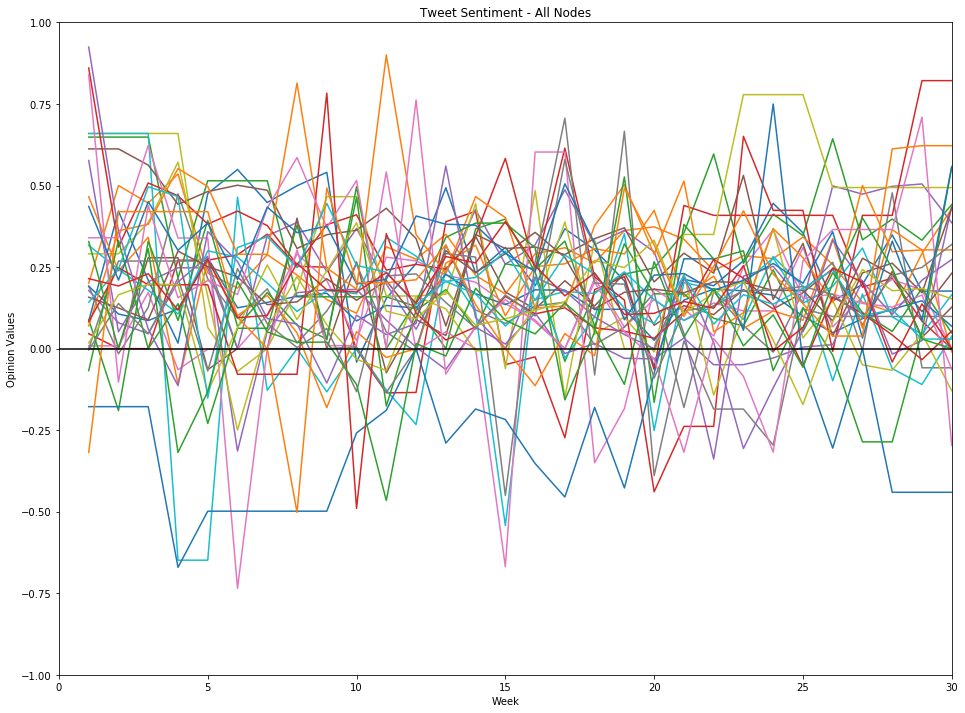

In [352]:
plt.figure(figsize=(16,12))
plt.plot(nltk_aggregate)
plt.xlim([0, 30])
plt.ylim([-1, 1])
plt.axhline(y = 0, color = 'k', linestyle = '-', lw = '1.5')
plt.xlabel('Week')
plt.ylabel('Opinion Values')
plt.title('Tweet Sentiment - All Nodes')
plt.show()

### Graphing the network

In [353]:
from networkx.readwrite import json_graph
import json

def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

In [354]:
g = read_json_file('twitter_follows')

In [415]:
g_pos = nx.circular_layout(g)

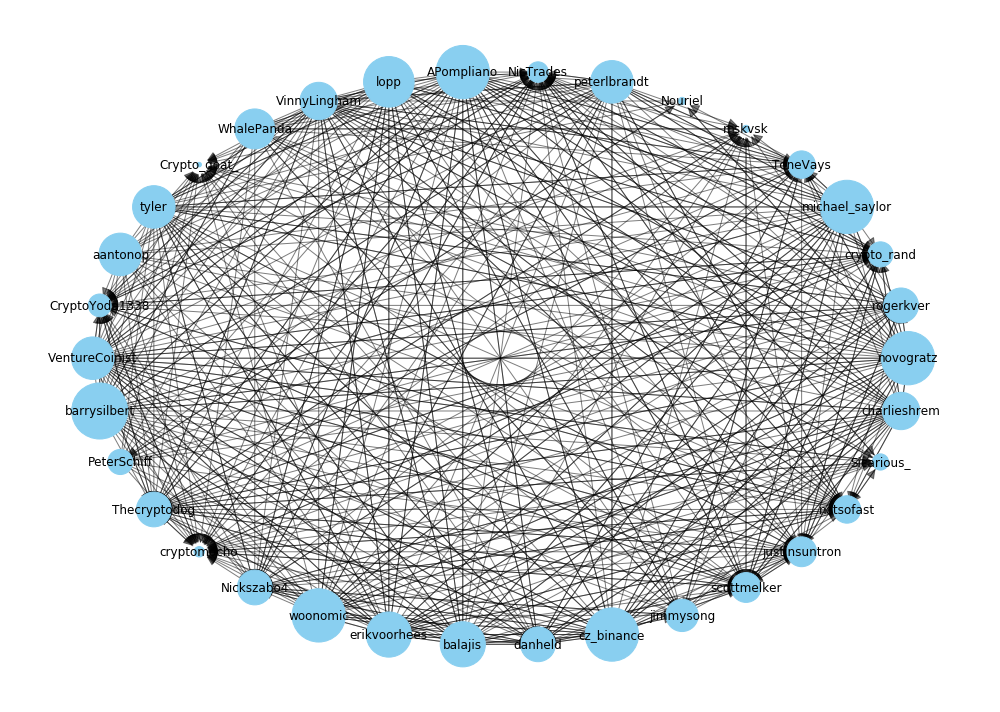

In [416]:
plt.figure(figsize=(14,10))

node_size = [g.out_degree(n)**2.5 +20 for n in g]

nx.draw_networkx_edges(g, g_pos, alpha=0.5, arrowsize=20)
nx.draw_networkx_nodes(g, g_pos, nodelist=g.nodes(), node_color='#89cff0', node_size=node_size)
labels = {}
for node in g: 
    labels[node] = node

nx.draw_networkx_labels(g, g_pos, labels)

plt.axis('off')
plt.tight_layout()
#plt.savefig("./FYP-Graphs-Term2/twitter_network.png")
plt.show()

In [417]:
g_nodes = [node for node in g.nodes()]
g_indegrees = [val for (node,val) in g.in_degree()]
g_outdegrees = [val for (node,val) in g.out_degree()] 

In [418]:
g.in_degree()

InDegreeView({'novogratz': 26, 'rogerkver': 12, 'crypto_rand': 18, 'michael_saylor': 16, 'ToneVays': 17, 'mskvsk': 14, 'Nouriel': 3, 'peterlbrandt': 14, 'NicTrades': 24, 'APompliano': 26, 'lopp': 12, 'VinnyLingham': 27, 'WhalePanda': 5, 'Crypto_goat_': 19, 'tyler': 18, 'aantonop': 0, 'CryptoYoda1338': 18, 'VentureCoinist': 28, 'barrysilbert': 13, 'PeterSchiff': 2, 'Thecryptodog': 25, 'cryptomocho': 27, 'Nickszabo4': 16, 'woonomic': 10, 'erikvoorhees': 21, 'balajis': 14, 'danheld': 18, 'cz_binance': 19, 'jimmysong': 5, 'scottmelker': 22, 'justinsuntron': 21, 'notsofast': 20, 'Sicarious_': 7, 'charlieshrem': 22})

In [419]:
g.out_degree()

OutDegreeView({'novogratz': 24, 'rogerkver': 17, 'crypto_rand': 13, 'michael_saylor': 24, 'ToneVays': 14, 'mskvsk': 4, 'Nouriel': 4, 'peterlbrandt': 20, 'NicTrades': 11, 'APompliano': 24, 'lopp': 23, 'VinnyLingham': 18, 'WhalePanda': 19, 'Crypto_goat_': 0, 'tyler': 20, 'aantonop': 20, 'CryptoYoda1338': 12, 'VentureCoinist': 20, 'barrysilbert': 25, 'PeterSchiff': 13, 'Thecryptodog': 17, 'cryptomocho': 6, 'Nickszabo4': 17, 'woonomic': 24, 'erikvoorhees': 21, 'balajis': 21, 'danheld': 17, 'cz_binance': 24, 'jimmysong': 16, 'scottmelker': 15, 'justinsuntron': 15, 'notsofast': 14, 'Sicarious_': 9, 'charlieshrem': 18})

In [420]:
df_g = pd.DataFrame()
df_g['node'] = g_nodes
df_g['in_degrees'] = g_indegrees # the number of people that affects me 
df_g['out_degrees'] = g_outdegrees # num of followers

In [421]:
df_g

,node,in_degrees,out_degrees
0,novogratz,26,24
1,rogerkver,12,17
2,crypto_rand,18,13
3,michael_saylor,16,24
4,ToneVays,17,14
5,mskvsk,14,4
6,Nouriel,3,4
7,peterlbrandt,14,20
8,NicTrades,24,11
9,APompliano,26,24


### Assigning initial opinion

In [422]:
initial_op

,name,opinion
0,aantonop,0.084571
1,APompliano,0.200689
2,balajis,0.648600
3,barrysilbert,0.046000
4,charlieshrem,0.576833
5,Crypto_goat_,0.000000
6,crypto_rand,0.008600
7,cryptomocho,0.191667
8,CryptoYoda1338,0.659700
9,cz_binance,0.659700


In [423]:
g.nodes()

NodeView(('novogratz', 'rogerkver', 'crypto_rand', 'michael_saylor', 'ToneVays', 'mskvsk', 'Nouriel', 'peterlbrandt', 'NicTrades', 'APompliano', 'lopp', 'VinnyLingham', 'WhalePanda', 'Crypto_goat_', 'tyler', 'aantonop', 'CryptoYoda1338', 'VentureCoinist', 'barrysilbert', 'PeterSchiff', 'Thecryptodog', 'cryptomocho', 'Nickszabo4', 'woonomic', 'erikvoorhees', 'balajis', 'danheld', 'cz_binance', 'jimmysong', 'scottmelker', 'justinsuntron', 'notsofast', 'Sicarious_', 'charlieshrem'))

In [424]:
for i, n in enumerate(g):
    g.nodes[n]['opinion'] = round(initial_op[initial_op['name'].str.match(n)].opinion.item(), 4)

In [425]:
g.nodes(data=True)

NodeDataView({'novogratz': {'opinion': 0.0696}, 'rogerkver': {'opinion': 0.9246}, 'crypto_rand': {'opinion': 0.0086}, 'michael_saylor': {'opinion': 0.6124}, 'ToneVays': {'opinion': 0.0176}, 'mskvsk': {'opinion': 0.34}, 'Nouriel': {'opinion': -0.1779}, 'peterlbrandt': {'opinion': -0.0675}, 'NicTrades': {'opinion': 0.2908}, 'APompliano': {'opinion': 0.2007}, 'lopp': {'opinion': 0.1784}, 'VinnyLingham': {'opinion': -0.3182}, 'WhalePanda': {'opinion': 0.3282}, 'Crypto_goat_': {'opinion': 0.0}, 'tyler': {'opinion': 0.1424}, 'aantonop': {'opinion': 0.0846}, 'CryptoYoda1338': {'opinion': 0.6597}, 'VentureCoinist': {'opinion': 0.4359}, 'barrysilbert': {'opinion': 0.046}, 'PeterSchiff': {'opinion': 0.0825}, 'Thecryptodog': {'opinion': -0.004}, 'cryptomocho': {'opinion': 0.1917}, 'Nickszabo4': {'opinion': 0.0}, 'woonomic': {'opinion': 0.2146}, 'erikvoorhees': {'opinion': 0.4658}, 'balajis': {'opinion': 0.6486}, 'danheld': {'opinion': 0.1915}, 'cz_binance': {'opinion': 0.6597}, 'jimmysong': {'opi

In [450]:
old_op = {}
for name in g: 
    old_op[name] = g.nodes[name]['opinion']

df_old_op = pd.DataFrame.from_dict(old_op.items())
df_old_op.columns = ['name', 'opinion']
list_op = df_old_op['opinion'].tolist()
list_op

[0.0696,
 0.9246,
 0.0086,
 0.6124,
 0.0176,
 0.34,
 -0.1779,
 -0.0675,
 0.2908,
 0.2007,
 0.1784,
 -0.3182,
 0.3282,
 0.0,
 0.1424,
 0.0846,
 0.6597,
 0.4359,
 0.046,
 0.0825,
 -0.004,
 0.1917,
 0.0,
 0.2146,
 0.4658,
 0.6486,
 0.1915,
 0.6597,
 0.0887,
 0.1576,
 0.8605,
 0.3167,
 0.8395,
 0.5768]

### Notes
highglight the 2 individuals that are skeptical towards bitcoin
- dynamic model
- 1 step predictions 
- simple graph learning 

### Simple Degroot Model 

In [432]:
def simple_degroot(G, G_pos, t, graph_interval):

    df_op = pd.DataFrame(columns=range(1,len(G)+1))

    for ite in range(t): # for each iteration in the specified time period
        
        old_op = {} # create a dictionary to store the old opinions
        for name in G: 
            old_op[name] = G.nodes[name]['opinion']
        
        df_old_op = pd.DataFrame.from_dict(old_op.items())
        df_old_op.columns = ['name', 'opinion']
        list_op = df_old_op['opinion'].tolist()
            
        df_op.loc[ite] = list_op
        
        if (ite%graph_interval == 1):
            plot_network(G, G_pos, old_op, f"Simple DeGroot - Network graph {ite}", 100)
        

        for node in G:
            
            if np.random.choice([0,1], p=[0.2, 0.8]) == 0: #comment out to see the difference of update probability
                continue
            
            neighbors = [neigh for neigh in G.neighbors(node)]
            op_sum = 0

            for neigh in neighbors: 
                op_sum = op_sum + old_op[neigh-1]/len(neighbors)

            op_sum = 0.5*old_op[node-1] + 0.5*op_sum
            G.nodes[node]['opinion'] = round(op_sum, 2)
    
    # deal with values from the final iteration
    last_op = list(nx.get_node_attributes(G, 'opinion').values())
    df_op.loc[t] = last_op
    stdev.append(statistics.stdev(last_op))
    mean = statistics.mean(last_op)
    plt.figure(figsize=(14,2))
    ax = plt.scatter(last_op, y, marker='x')
    ax.axes.yaxis.set_visible(False)
    plt.xlim([-1, 1])
    plt.title(('Iteration {}, Standard Deviation = {}, Converged = {}'.format(ite, 
                                                                              round(statistics.stdev(last_op),3), 
                                                                              converged)))
    plt.xlabel('Opinion Values')
    plt.show()
    plot_network(G, G_pos, last_op, "Simple DeGroot - Final network graph", 100)
            
    if converged: 
        print(f"Opinions converged (s.d. below 0.01) in {converged_ite} iterations. Mean = {mean}")
    else: 
        print(f"Opinions not converged (s.d. above 0.01). Mean = {mean}")
        
    return df_op, stdev

In [433]:
df_sdg, std_sdg = simple_degroot(g, g_pos, 30, 5)

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_sdg)
plt.xlim([0, 20])
plt.ylim([-1, 1])
plt.xlabel('Time')
plt.ylabel('Opinion Values')
plt.title("Simple DeGroot Model - opinion dynamics")
plt.xticks(range(0,21))
plt.savefig("./FYP-Graphs/simple_dg_opdyn.png")

### Degree Centrality Weighted Model

In [ ]:
# degree centrality
kc_deg_cent = list(nx.degree_centrality(kc).values())
df_kc['deg_cent'] = kc_deg_cent

In [431]:
def weighted_centrality(G, G_pos, t, graph_interval, cent): #cent is whatever centrality list, pre-generated
    y = np.zeros(len(G))
    converged_ite = 0
    converged = False
    df_op = pd.DataFrame(columns=range(1,len(G)+1))
    stdev = []

    for ite in range(t):
        old_op = list(nx.get_node_attributes(G, 'opinion').values())
        df_op.loc[ite] = old_op
        std = statistics.stdev(old_op)
        stdev.append(std)
        
        if std < 0.01 and converged == False:
            converged_ite = ite
            converged = True
        
        if (ite%graph_interval == 1):
            plt.figure(figsize=(14,2))
            ax = plt.scatter(old_op, y, marker='x')
            ax.axes.yaxis.set_visible(False)
            plt.xlim([-1, 1])
            plt.title(('Iteration {}, Standard Deviation = {}, Converged = {}'.format(ite, round(std,3), converged)))
            plt.xlabel('Opinion Values')
            plt.tight_layout()
            plt.savefig(f'./FYP-Graphs/Distance Weighted - Scatter {ite}')
            plt.show()
            plot_network(G, G_pos, old_op, f"Weighted Centraility- Network graph {ite}", 100)
        

        for node in G:
            
            if np.random.choice([0,1], p=[0.3, 0.7]) == 0: #comment out to see the difference of update probability
                continue
            
            neighbors = [neigh for neigh in G.neighbors(node)]
            weights = [cent[neigh-1] for neigh in neighbors]
            weights_norm = [round(i/sum(weights),3) for i in weights] 
            op_sum = 0

            for neigh in neighbors: 
                op_sum = op_sum + old_op[neigh-1]*weights_norm[neighbors.index(neigh)]

            op_sum = 0.5*old_op[node-1] + 0.5*op_sum
            G.nodes[node]['opinion'] = round(op_sum, 2)
            
    # deal with values from the final iteration
    last_op = list(nx.get_node_attributes(G, 'opinion').values())
    df_op.loc[t] = last_op
    stdev.append(statistics.stdev(last_op))
    mean = statistics.mean(last_op)
    plt.figure(figsize=(14,2))
    ax = plt.scatter(last_op, y, marker='x')
    ax.axes.yaxis.set_visible(False)
    plt.xlim([-1, 1])
    plt.title(('Iteration {}, Standard Deviation = {}, Converged = {}'.format(ite, 
                                                                              round(statistics.stdev(last_op),3), 
                                                                              converged)))
    plt.xlabel('Opinion Values')
    plt.show()
    plot_network(G, G_pos, old_op, "Weighted Centraility- Final network graph", 100)
    
    if converged: 
        print(f"Opinions converged (s.d. below 0.01) in {converged_ite} iterations. Mean = {mean}")
    else: 
        print(f"Opinions not converged (s.d. above 0.01). Mean = {mean}")
        
    return df_op, stdev

In [ ]:
df_weicen_dg, std_weicen_dg = weighted_centrality(kc, kc_pos, 20, 5, kc_deg_cent)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df_weicen_dg)
plt.xlim([0, 20])
plt.ylim([-1, 1])
plt.xlabel('Time')
plt.ylabel('Opinion Values')
plt.title("Weighted Degree Centrality Model - opinion dynamics")
plt.xticks(range(0,21))
plt.savefig("./FYP-Graphs/weicen_dg_opdyn.png")

### Distance Exponentially weighted Model

### Friedken Johnsen Model: with subjectivity as the prejudice factor